In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("movies.csv")

In [3]:
print(df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [5]:
data_shape = df.shape

In [6]:
print(data_shape)

(9742, 3)


In [7]:
df_2 = pd.read_csv("ratings.csv")

In [8]:
data_shape_1 = df_2.shape
print(data_shape_1)

(100836, 4)


In [11]:
print(df_2.columns)


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [12]:
unique_user_ids = df_2['userId'].nunique()


In [13]:
print(f'The number of unique userId values is: {unique_user_ids}')

The number of unique userId values is: 610


In [14]:
movie_ratings_count = df_2['movieId'].value_counts()


max_rated_movie_id = movie_ratings_count.idxmax()


max_rated_movie_details = df_2[df_2['movieId'] == max_rated_movie_id]['movieId'].iloc[0]

print(f"The movie with the maximum number of user ratings is: {max_rated_movie_details}")

The movie with the maximum number of user ratings is: 356


In [15]:
import pandas as pd


tags_df = pd.read_csv('tags.csv')


movies_df = pd.read_csv('movies.csv')


matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]


matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag']


print("Tags submitted by users to 'Matrix, The (1999)':")
print(matrix_tags.unique())


Tags submitted by users to 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [16]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')

movies_df = pd.read_csv('movies.csv')


terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]


terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating']


average_rating = terminator_ratings.mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


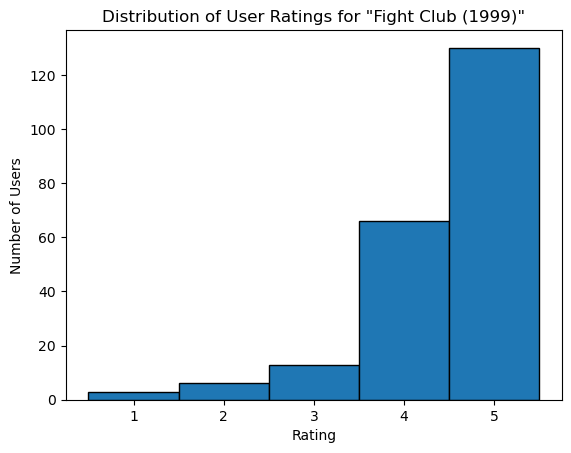

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


ratings_df = pd.read_csv('ratings.csv')

movies_df = pd.read_csv('movies.csv')


fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].iloc[0]


fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']


plt.hist(fight_club_ratings, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks([1, 2, 3, 4, 5])
plt.show()


In [21]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')


ratings_summary = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})


ratings_summary.columns = ['num_ratings', 'average_rating']


print(ratings_summary)


         num_ratings  average_rating
movieId                             
1                215        3.920930
2                110        3.431818
3                 52        3.259615
4                  7        2.357143
5                 49        3.071429
...              ...             ...
193581             1        4.000000
193583             1        3.500000
193585             1        3.500000
193587             1        3.500000
193609             1        4.000000

[9724 rows x 2 columns]


In [19]:
import pandas as pd


movies_df = pd.read_csv('movies.csv')


ratings_summary = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_summary.columns = ['num_ratings', 'average_rating']

merged_df = pd.merge(movies_df, ratings_summary, on='movieId', how='inner')


print(merged_df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  num_ratings  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy          215        3.920930  
1                   Adventure|Children|Fantasy          110        3.431818  
2                               Comedy|Romance           52        3.259615  
3                         Comedy|Drama|Romance            7        2.357143  
4                                       Comedy           49        3.071429  


In [20]:
filtered_movies = merged_df[merged_df['num_ratings'] > 50]
print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  num_ratings  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy          215        3.920930  
1                   Adventure|Children|Fantasy          110        3.431818  
2                               Comedy|Romance           52        3.259615  
5                        Action|Crime|Thriller          102        3.946078  
6                               Comedy|Romance           54        3.185185  


In [22]:

highest_rated_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax()]


print("Movie with the highest average rating:")
print(highest_rated_movie[['title', 'average_rating']])


Movie with the highest average rating:
title             Shawshank Redemption, The (1994)
average_rating                            4.429022
Name: 277, dtype: object


In [23]:

ratings_count = ratings_df.groupby('movieId')['rating'].count()


sorted_movies = ratings_count.sort_values(ascending=False)


top_5_popular_movies = sorted_movies.head(5)


print("Top 5 popular movies based on the number of user ratings:")
print(top_5_popular_movies)


Top 5 popular movies based on the number of user ratings:
movieId
356     329
318     317
296     307
593     279
2571    278
Name: rating, dtype: int64


In [24]:
import pandas as pd


movies_df = pd.read_csv('movies.csv')


merged_df = pd.merge(ratings_df, movies_df, on='movieId', how='inner')


sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]


sci_fi_ratings_count = sci_fi_movies.groupby('movieId')['rating'].count()


sorted_sci_fi_movies = sci_fi_ratings_count.sort_values(ascending=False
                                                        
third_most_popular_sci_fi_movie_id = sorted_sci_fi_movies.index[2]
third_most_popular_sci_fi_movie = movies_df[movies_df['movieId'] == third_most_popular_sci_fi_movie_id]


print("Third most popular Sci-Fi movie based on the number of user ratings:")
print(third_most_popular_sci_fi_movie[['title', 'genres']])


Third most popular Sci-Fi movie based on the number of user ratings:
                    title                            genres
418  Jurassic Park (1993)  Action|Adventure|Sci-Fi|Thriller


In [27]:
links_df = pd.read_csv("links.csv")

In [28]:
print(links_df.head())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [33]:
import pandas as pd


links_df = pd.read_csv('links.csv')


max_imdb_id_row = links_df.loc[links_df['imdbId'].idxmax()]


print("Row with the maximum IMDb ID:")
print(max_imdb_id_row)


Row with the maximum IMDb ID:
movieId     193587.0
imdbId     8391976.0
tmdbId      483455.0
Name: 9740, dtype: float64


In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the IMDb rating - Update these values based on IMDb website structure
    imdb_rating_tag = soup.find('span', {'itemprop': 'ratingValue'})
    
    # If IMDb rating tag is found, return the text; otherwise, return NaN
    return imdb_rating_tag.text if imdb_rating_tag else np.nan


In [ ]:
import pandas as pd

filtered_movies = pd.merge(filtered_movies, links[['movieId', 'imdbId']], on='movieId', how='left')


filtered_movies = filtered_movies.dropna(subset=['imdbId'])


filtered_movies['imdb_rating'] = filtered_movies['imdbId'].apply(scrapper)

print(filtered_movies[['movieId', 'imdb_rating']])


In [ ]:

highest_rated_movie_imdb = filtered_movies.loc[filtered_movies['imdb_rating'].idxmax()]


print("MovieId of the highest-rated movie (IMDb):", highest_rated_movie_imdb['movieId'])
